In [19]:
import pandas as pd
import numpy as np

In [20]:
#Import OK Cupid Profiles
df = pd.read_csv("profiles.csv")

C:\Users\jenni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [21]:
#Look at Data
print(df.head())

  age       body_type               diet    drinks      drugs  \
0  22  a little extra  strictly anything  socially      never   
1  35         average       mostly other     often  sometimes   
2  38            thin           anything  socially        NaN   
3  23            thin         vegetarian  socially        NaN   
4  29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                               

In [22]:
#Drop NA lines
new_df = df.dropna()

In [23]:
print(new_df.columns)
print(len(df))


Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
60555


In [24]:
#Look at status and other potential features
print(new_df["status"].value_counts())

single            5418
available          202
seeing someone     194
married             30
Name: status, dtype: int64


<AxesSubplot:>

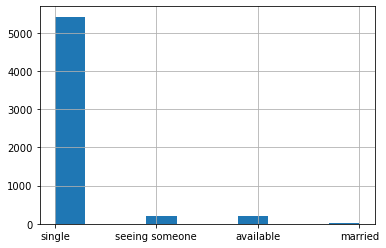

In [25]:
new_df["status"].hist()

In [26]:
print(new_df["sex"].value_counts())

m    3425
f    2419
Name: sex, dtype: int64


In [27]:
print(new_df["drugs"].value_counts())

never        4493
sometimes    1268
often          83
Name: drugs, dtype: int64


In [28]:
print(new_df["drinks"].value_counts())

socially       3966
rarely          746
often           516
not at all      503
very often       69
desperately      44
Name: drinks, dtype: int64


In [29]:
print(new_df["education"].value_counts())

graduated from college/university    2336
graduated from masters program        913
working on college/university         785
graduated from two-year college       233
graduated from high school            206
working on two-year college           176
working on masters program            168
dropped out of college/university     159
graduated from ph.d program           126
graduated from law school             118
dropped out of space camp              99
graduated from space camp              82
working on ph.d program                80
working on space camp                  69
college/university                     60
graduated from med school              48
dropped out of two-year college        28
working on med school                  24
dropped out of masters program         23
working on law school                  22
dropped out of high school             21
two-year college                       19
working on high school                 16
dropped out of ph.d program       

In [30]:
print(new_df["pets"].value_counts())

likes dogs and likes cats          2350
likes dogs                          788
likes dogs and has cats             690
has dogs                            451
has dogs and likes cats             429
likes dogs and dislikes cats        350
has dogs and has cats               258
has cats                            156
likes cats                          143
has dogs and dislikes cats          103
dislikes dogs and likes cats         59
dislikes dogs and dislikes cats      36
dislikes dogs and has cats           15
dislikes cats                        12
dislikes dogs                         4
Name: pets, dtype: int64


In [31]:
print(new_df["income"].value_counts())

50000      4120
20000       621
100000      216
30000       166
40000       163
80000       147
60000       120
70000        94
150000       88
1000000      81
250000       20
500000        8
Name: income, dtype: int64


In [32]:
print(new_df["religion"].value_counts())

agnosticism but not too serious about it      447
agnosticism and laughing about it             412
other and laughing about it                   396
atheism and laughing about it                 355
catholicism but not too serious about it      349
christianity but not too serious about it     345
other but not too serious about it            333
other                                         330
agnosticism                                   286
atheism but not too serious about it          198
atheism                                       189
judaism but not too serious about it          183
christianity and somewhat serious about it    170
christianity                                  168
other and somewhat serious about it           167
atheism and somewhat serious about it         157
catholicism and laughing about it             131
buddhism but not too serious about it         116
atheism and very serious about it             106
agnosticism and somewhat serious about it     100


In [126]:
print(new_df["smokes"].value_counts())

no                4639
sometimes          423
when drinking      319
yes                266
trying to quit     197
Name: smokes, dtype: int64


In [222]:
#Changed Text to Integers for Certain Columns
new_dictionary = {"status": {"single":0, "available":0, "seeing someone":1, "married":1}, 
                 "drinks": {"socially":1, "rarely":1, "not at all":0, "often":2, "very often":2, "desperately":2},
                 "drugs": {"never":0, "sometimes":1, "often":2},
                 "orientation": {"straight":0, "bisexual":1, "gay":2},
                  "sex":{"m":0, "f":1},
                  "education":{"graduated from med school":8,"working on med school":8, "graduated from ph.d program":8, "working on ph.d program":8, "graduated from law school":7,"working on law school":7,"dropped out of ph.d program":6,"dropped out of law school":6,"space camp":5, "graduated from space camp":5, "working on space camp":5, "dropped out of space camp":4,"graduated from masters program":6,"masters program":6,"working on masters program":6,"dropped out of masters program":5, "graduated from college/university":5,"college/university":5, "graduated from two-year college":4, "working on college/university":5,"working on two-year college":4, "dropped out of two-year college":3,"two-year college":4, "dropped out of college/university":3, "graduated from high school":2,"high school":2,"working on high school":1, "dropped out of high school":0},
                  "pets":{"likes dogs and likes cats":2,"likes dogs":2,"likes dogs and has cats":2,"has dogs":2,"has dogs and likes cats":2,"likes dogs and dislikes cats":1,"has dogs and has cats":2,"has cats":2,"likes cats":2,"has dogs and dislikes cats":1,"dislikes dogs and likes cats":1,"dislikes dogs and dislikes cats":0,"dislikes dogs and has cats":1,"dislikes cats":0,"dislikes dogs":0},
                  "religion":{"agnosticism but not too serious about it":1,"other and laughing about it":2,"agnosticism and laughing about it":1,"atheism and laughing about it":1,"christianity but not too serious about it":3,"catholicism but not too serious about it":3,"other but not too serious about it":3,"other":14,"agnosticism":1,"atheism but not too serious about it":1,"atheism":0,"judaism but not too serious about it":3,"christianity":4,"other and somewhat serious about it":14,"christianity and somewhat serious about it":4,"atheism and somewhat serious about it":0,"catholicism and laughing about it":2,"atheism and very serious about it":0,"buddhism but not too serious about it":2,"agnosticism and somewhat serious about it":0,"other and very serious about it":14,"catholicism and somewhat serious about it":8,"christianity and very serious about it":8,"buddhism and somewhat serious about it":12,"judaism and laughing about it":2,"buddhism and laughing about it":2,"catholicism":4,"agnosticism and very serious about it":0,"christianity and laughing about it":2,"judaism and somewhat serious about it":6,"judaism":6,"buddhism":12,"catholicism and very serious about it":8,"hinduism and somewhat serious about it":5,"hinduism but not too serious about it":2,"buddhism and very serious about it":13,"islam but not too serious about it":2,"hinduism":5,"islam and somewhat serious about it":7,"judaism and very serious about it":10,"hinduism and very serious about it":9,"islam and very serious about it":11,"hinduism and laughing about it":2,"islam and laughing about it":2,"islam":7},
                  "offspring": {"doesn&rsquo;t have kids, but might want them":1,"doesn&rsquo;t want kids":0,"doesn&rsquo;t have kids, but wants them":2,"doesn&rsquo;t have kids":1,"wants kids":2, "has a kid":4,"has kids":4,"doesn&rsquo;t have kids, and doesn&rsquo;t want any":0,"has kids, but doesn&rsquo;t want more":3,"has a kid, but doesn&rsquo;t want more":3,"has a kid, and wants more":5,"has kids, and might want more":5,"might want kids":2,"has a kid, and might want more":5,"has kids, and wants more":6,"n":0},
                  "smokes": {"no":0,"sometimes":1,"when drinking":1,"yes":2,"trying to quit":2}}   
new_dff = new_df.replace(new_dictionary)


In [223]:
print(new_dff.head())

   age       body_type               diet  drinks  drugs  education  \
0   22  a little extra  strictly anything       1      0          5   
9   37        athletic    mostly anything       0      0          4   
11  28         average    mostly anything       1      0          5   
18  31         average  mostly vegetarian       1      0          5   
19  33        athletic    mostly anything       1      0          6   

                                               essay0  \
0   about me:<br />\n<br />\ni would love to think...   
9   my names jake.<br />\ni'm a creative guy and i...   
11  i was born in wisconsin, grew up in iowa, and ...   
18  some of my favorite things:<br />\nriding my m...   
19  i relocated to san francisco half a year ago. ...   

                                               essay1  \
0   currently working as an international agent fo...   
9   i have an apartment. i like to explore and che...   
11  i'm currently the youngest member on an intern...   
18

In [224]:
#nothings is particularly correlated although drugs/age slight negative correlation, education/age slight positive, religion/age slight positive, education/age slight positive
new_dff.corr()

,drinks,drugs,education,income,orientation,pets,religion,sex,smokes,status
drinks,1.000000,0.246865,-0.004950,0.051706,-0.007533,-0.014284,-0.097086,-0.000123,0.172669,-0.003709
drugs,0.246865,1.000000,-0.138429,0.065015,0.048684,0.007492,-0.058480,-0.070345,0.340562,0.025139
education,-0.004950,-0.138429,1.000000,-0.002856,-0.012230,0.002520,0.002140,0.084116,-0.210768,-0.011726
income,0.051706,0.065015,-0.002856,1.000000,-0.018794,-0.014181,0.003890,-0.071996,0.038861,-0.003548
orientation,-0.007533,0.048684,-0.012230,-0.018794,1.000000,-0.030393,0.026012,-0.000251,0.037519,0.041629
pets,-0.014284,0.007492,0.002520,-0.014181,-0.030393,1.000000,0.000822,-0.003919,-0.005805,0.016322
religion,-0.097086,-0.058480,0.002140,0.003890,0.026012,0.000822,1.000000,0.112119,-0.015135,-0.033068
sex,-0.000123,-0.070345,0.084116,-0.071996,-0.000251,-0.003919,0.112119,1.000000,-0.057960,0.031269
smokes,0.172669,0.340562,-0.210768,0.038861,0.037519,-0.005805,-0.015135,-0.057960,1.000000,0.001578
status,-0.003709,0.025139,-0.011726,-0.003548,0.041629,0.016322,-0.033068,0.031269,0.001578,1.000000


In [330]:
#scale
data = new_dff[["pets","smokes","offspring","education","income","age", "drinks", "status", "drugs", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[ 0.31963489  1.1870003  -0.12881276 -0.07391855 -0.13175463 -1.03776688
 -0.04904717 -0.19964381 -0.53096386 -0.39497345  0.31963489 -0.86421531]


In [331]:
#Gender, correctly labels gender 82%
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff["sex"]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.6244653550042771


In [332]:
# Make predictions for the test set
y_pred_test = forest.predict(validation_data)

In [333]:
print(y_pred_test)

[0 0 0 ... 1 0 0]


In [334]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(validation_labels, y_pred_test)

array([[531, 177],
       [262, 199]], dtype=int64)

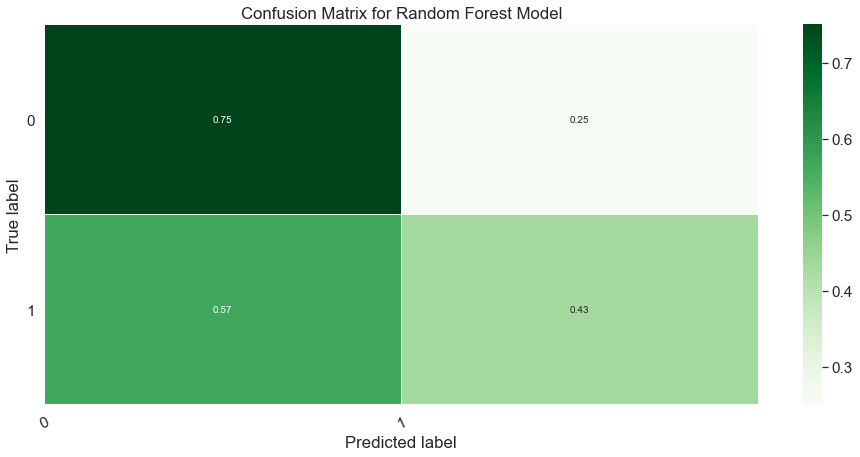

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labels, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [265]:
#scale
data = new_dff[["pets","smokes","sex","height","offspring","education","age", "drinks", "status", "drugs", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[ 0.31963489  1.1870003  -0.8404031   1.69780369 -0.12881276 -0.07391855
 -1.03776688 -0.04904717 -0.19964381 -0.53096386 -0.39497345  0.31963489
 -0.86421531]


In [266]:
#labels income 65% of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["income"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.6467065868263473


In [267]:
#scale
data = new_dff[["pets","smokes","income","sex","height","offspring","education","age", "status", "drugs", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[ 0.31963489  1.1870003  -0.13175463 -0.8404031   1.69780369 -0.12881276
 -0.07391855 -1.03776688 -0.19964381 -0.53096386 -0.39497345  0.31963489
 -0.86421531]


In [268]:
#labels level of drinking 80% of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["drinks"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.7938408896492729


In [269]:
#without drugs
#scale
data = new_dff[["pets","smokes","income","sex","height","offspring","education","age", "status", "drinks", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[ 0.31963489  1.1870003  -0.13175463 -0.8404031   1.69780369 -0.12881276
 -0.07391855 -1.03776688 -0.19964381 -0.04904717 -0.39497345  0.31963489
 -0.86421531]


In [270]:
#labels level of drug use %76 of the time
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["drugs"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.7630453378956373


In [271]:
#without relationship status
#scale
data = new_dff[["pets","smokes","income","sex","height","offspring","education","age", "drugs", "drinks", "orientation", "pets", "religion"]]
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[ 0.31963489  1.1870003  -0.13175463 -0.8404031   1.69780369 -0.12881276
 -0.07391855 -1.03776688 -0.53096386 -0.04904717 -0.39497345  0.31963489
 -0.86421531]


In [272]:
#labels relationship status 96% of the time, but they are mostly single
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
labels = new_dff[["status"]]
data = scaled_data
training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels, train_size = 0.7, test_size = 0.3, random_state = 1)
forest = RandomForestClassifier(random_state = 1)
forest.fit(training_data, np.ravel(training_labels,order='C'))
print(forest.score(validation_data, validation_labels))

0.9657924743443558


In [273]:
# Make predictions for the test set
y_pred_test = forest.predict(validation_data)

In [274]:
#small dtataset, doesn't work for married so changed married to 1 as well
print(y_pred_test)

[0 0 0 ... 0 0 0]


In [275]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix(validation_labels, y_pred_test)

array([[1694,    3],
       [  57,    0]], dtype=int64)

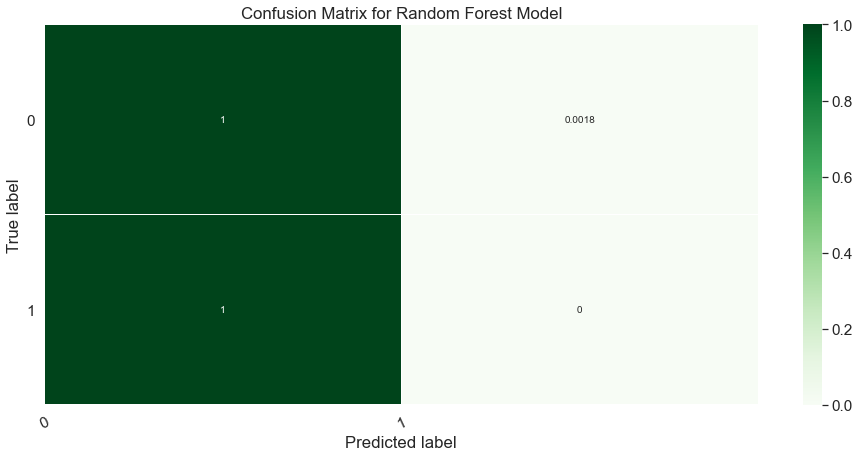

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(validation_labels, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = [0,1]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [277]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from os.path import join, dirname, abspath
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [326]:
#scale
data = new_dff[["pets","smokes","offspring","education","income", "drinks", "drugs","religion","status"]]
from sklearn.preprocessing import scale
scaled_datan = scale(data, axis = 0)
print(scaled_datan[0])

[ 0.31963489  1.1870003  -0.12881276 -0.07391855 -0.13175463 -0.04904717
 -0.53096386 -0.86421531 -0.19964381]


In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [328]:
from sklearn.cluster import KMeans

In [329]:
kmeans = KMeans(100)
kfit = kmeans.fit(scaled_datan)
identified_clusters = kfit.predict(scaled_data)

In [325]:
clustered_data = new_dff.copy()
clustered_data['Cluster'] = identified_clusters
#Viewing the data with clusters
display(clustered_data.sort_values(by='Cluster'))

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,Cluster
43327,32,a little extra,mostly anything,2,0,5,this is weird...i guess the one thing i can sa...,"currently, trying very hard to move away from ...",...obviously not self promotion.,folks say i have a 'strong presence' after ini...,...,1,0,2,1,1,pisces and it&rsquo;s fun to think about,0,"english (fluently), japanese (poorly), spanish...",0,0
53670,23,average,mostly anything,2,0,5,"a guy who has fun, doesn't take life too serio...","going to sfsu studying business management, an...","cooking, relaxing, camping, smiling, drinking,...","my big smile, especially if i'm drunk",...,1,0,2,2,0,pisces but it doesn&rsquo;t matter,0,english,0,0
39377,29,skinny,mostly anything,2,0,4,im a transsexual looking for young white singl...,n joying everyday...<br />\nlife is too short...,hmm... my hands im an artist,my eyes... n legs..,...,0,0,2,3,1,sagittarius but it doesn&rsquo;t matter,0,english (fluently),0,0
9514,50,a little extra,mostly anything,2,0,5,"self deprecating, fairly happy-go-lucky, quasi...",i wish i knew. what i want to do is make a dif...,evading questions for which there is no really...,you tell me..... everyone is going to see some...,...,0,2,2,2,0,cancer and it&rsquo;s fun to think about,0,"english (fluently), latin (poorly), french (po...",0,0
53086,39,fit,mostly anything,2,0,5,"dont know where to start, so i wont yet... jus...","starting life in sf, where i got eight months ...","i do like to do many things, including paintin...",never asked.,...,1,0,2,1,0,aries and it&rsquo;s fun to think about,0,"english (okay), spanish (fluently)",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37697,20,fit,mostly vegetarian,1,1,5,i was studying graphic and product design for ...,"working as a line/prep cook. studying physics,...","enjoying things, creating things, making music...","how much of a smart ass i am, my eyes, imagina...",...,2,0,2,2,0,aries,1,"english (fluently), dutch (okay), spanish (okay)",0,99
37689,22,average,mostly vegetarian,1,1,5,i would describe myself as an intense but fun ...,i'm currently studying at grinnell college and...,"programming in ruby, having long intellectual ...",my glasses. and my offbeat sense of humor.,...,1,0,2,2,0,aries and it&rsquo;s fun to think about,1,"english (fluently), lisp (okay), hindi (fluent...",0,99
46069,21,curvy,anything,1,1,5,still just wandering.,"i left sfsu to go to ccsf, where i can take wh...","interrupting, arguing, staying up really, real...","""are you high?""",...,2,0,2,0,1,capricorn and it&rsquo;s fun to think about,1,english (fluently),0,99
29806,33,average,mostly anything,1,1,5,"i live and work in sf, and am a bay area nativ...",for work: i am a software qa engineer for a pr...,guitar. if you want to hear any of it:<br />\n...,"i will shake your hand, and repeat your name. ...",...,1,0,2,1,0,taurus but it doesn&rsquo;t matter,1,"english (fluently), spanish (poorly)",0,99


In [320]:
clustered_data.to_csv(r'C:\Users\jenni\OneDrive\Desktop\cluster13.csv', index = False)